In [ ]:
# Install Required Libraries
# installed Numpy for mathematical calculations
# installed Pandas for data manipulations tasks
# installed Matplotlib for basic visualizatins
# installed Seaborn for advanced visualizations
# installed asyncpg for integrating postgres with python

In [1]:
import asyncpg
import asyncio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
import asyncpg # used to interact with postgreSQL database
import asyncio # used to manage SQL operations
import pandas as pd # convert fetched data into a dataframe

async def fetch_data(): #async function will helps other tasks to perform while working in DB
    conn = await asyncpg.connect( # connect to DB 
        user='postgres',
        password='Smartsai@123',
        database='project_cars',
        host='localhost',
        port='5432'
    )

    query = "SELECT * FROM main_cars;"  # Query to fetch all the records from main_cars
    rows = await conn.fetch(query)

    # Convert to DataFrame
    df = pd.DataFrame(rows, columns=list(rows[0].keys()))  # Converting data into dataframe
    await conn.close() # closing database connection
    return df

# Directly await the coroutine in environments where the event loop is already running
df = await fetch_data() # call the function and wait for all the data executed
print(df.head())


   car_id   make   model      fuel    gear  mileage  price   hp  \
0    1400  Mazda       2  Gasoline  Manual      424  16880   90   
1    1401   Ford   Focus    Diesel  Manual     1157  19390  150   
2    1402   Ford   Focus    Diesel  Manual      736  19790  150   
3    1403   Ford   Focus    Diesel  Manual      505  19970  150   
4    1454   Ford  Fiesta    Diesel  Manual    12400   5200   75   

   manufacture_year       offertype mileage_category     hp_category  \
0              2020   Demonstration      Low Mileage       Low Power   
1              2020  Employee's car      Low Mileage  Moderate Power   
2              2020  Employee's car      Low Mileage  Moderate Power   
3              2020  Employee's car      Low Mileage  Moderate Power   
4              2013            Used      Low Mileage       Low Power   

  separate_cars  
0    Latest Car  
1    Latest Car  
2    Latest Car  
3    Latest Car  
4       Old Car  


In [125]:
df.to_csv(r'C:\Users\saikumar\Desktop\MSc Data Analytics\Project_cars\main_cars_data_pgsql.csv', index=False)
print("Data saved to main_cars_data_pgsql.csv.")
# saving this data locall

Data saved to main_cars_data_pgsql.csv.


In [25]:
print(df.shape)

(46033, 13)


In [13]:
print("Missing values:\n", df.isnull().sum()) # check for missing values count
# There is no missing values found in the dataframe because it is already cleaned in SQL

Missing values:
 car_id              0
make                0
model               0
fuel                0
gear                0
mileage             0
price               0
hp                  0
manufacture_year    0
offertype           0
mileage_category    0
hp_category         0
separate_cars       0
dtype: int64


In [14]:
# Describing the dataframe
print('Summary:\n',df.describe)

Summary:
 <bound method NDFrame.describe of    car_id   make   model      fuel    gear  mileage  price   hp  \
0    1400  Mazda       2  Gasoline  Manual      424  16880   90   
1    1401   Ford   Focus    Diesel  Manual     1157  19390  150   
2    1402   Ford   Focus    Diesel  Manual      736  19790  150   
3    1403   Ford   Focus    Diesel  Manual      505  19970  150   
4    1454   Ford  Fiesta    Diesel  Manual    12400   5200   75   

   manufacture_year       offertype mileage_category     hp_category  \
0              2020   Demonstration      Low Mileage       Low Power   
1              2020  Employee's car      Low Mileage  Moderate Power   
2              2020  Employee's car      Low Mileage  Moderate Power   
3              2020  Employee's car      Low Mileage  Moderate Power   
4              2013            Used      Low Mileage       Low Power   

  separate_cars  
0    Latest Car  
1    Latest Car  
2    Latest Car  
3    Latest Car  
4       Old Car  >


In [15]:
df.dtypes

car_id               int64
make                object
model               object
fuel                object
gear                object
mileage              int64
price                int64
hp                   int64
manufacture_year     int64
offertype           object
mileage_category    object
hp_category         object
separate_cars       object
dtype: object

In [20]:
print(df['price'].isnull().sum()) # check for null values in the price

0


In [26]:
# sample visualizations of entities in the cars dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46033 entries, 0 to 46032
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   car_id            46033 non-null  int64 
 1   make              46033 non-null  object
 2   model             46033 non-null  object
 3   fuel              46033 non-null  object
 4   gear              46033 non-null  object
 5   mileage           46033 non-null  int64 
 6   price             46033 non-null  int64 
 7   hp                46033 non-null  int64 
 8   manufacture_year  46033 non-null  int64 
 9   offertype         46033 non-null  object
 10  mileage_category  46033 non-null  object
 11  hp_category       46033 non-null  object
 12  separate_cars     46033 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.6+ MB


In [27]:
df.shape


(46033, 13)

In [28]:
df.dropna(inplace = True)

In [29]:
df.shape

(46033, 13)

In [30]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['car_id', 'make', 'model', 'fuel', 'gear', 'mileage', 'price', 'hp',
       'manufacture_year', 'offertype', 'mileage_category', 'hp_category',
       'separate_cars'],
      dtype='object')>

In [31]:
df['make'].value_counts() # we have total of 66 makers

make
Volkswagen    6907
Opel          4789
Ford          4410
Skoda         2874
Renault       2778
              ... 
Piaggio          1
FISKER           1
Others           1
Isuzu            1
Alpine           1
Name: count, Length: 66, dtype: int64

In [32]:
df['model'].value_counts() # we have total of 827 models type for all 66 makers

model
Golf      1489
Corsa     1485
Fiesta    1273
Astra     1190
Focus      985
          ... 
Martin       1
S 260        1
e-Niro       1
A110         1
NV250        1
Name: count, Length: 827, dtype: int64

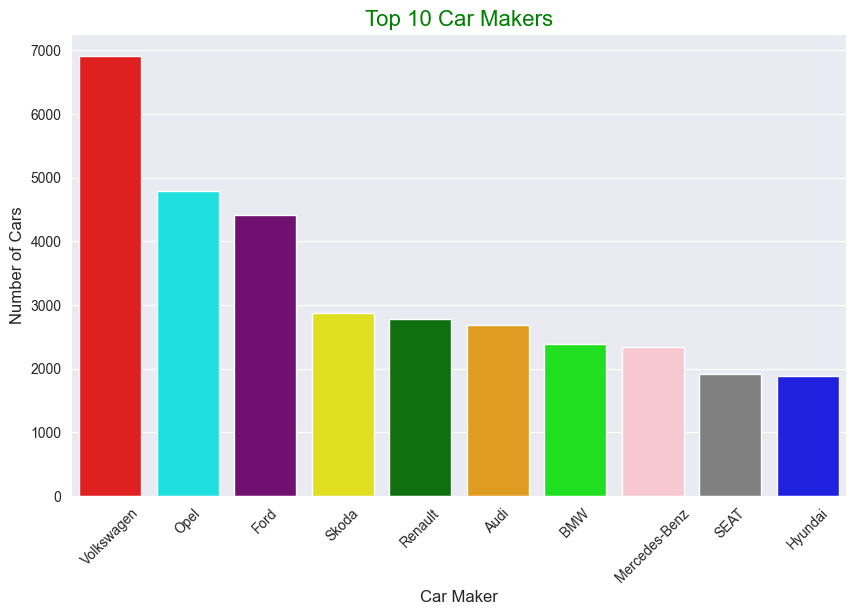

In [36]:
# displaying visualization for top 10 car makers out of 66 car makers
top_makers = df['make'].value_counts().head(10) # to get start 10

# create new dataframe
top_makers_df= top_makers.reset_index()
top_makers_df.columns=['make','count']
# different colors for different makers
colors = ['#FF0000', '#00FFFF', '#800080', '#FFFF00', '#008000','#FFA500', '#00FF00', '#FFC0CB', '#808080','#0000FF']

plt.figure(figsize=(10, 6))
sns.barplot(x='make', y='count', data=top_makers_df,hue='make',legend=False, palette=colors)
# when we use hue and legend then we did not get the future warning
# Chart labeling
plt.title("Top 10 Car Makers", color='green', fontsize=16)
plt.xlabel("Car Maker", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # rotation for readabilty
plt.show()

In [37]:
# We have total 13 columns, in that columns we have some irrelavent columns which are not useful for ML Algorithms so I need to drop that 
df.drop(columns=['car_id', 'mileage_category', 'hp_category', 'separate_cars'], inplace=True)

In [38]:
df.dtypes


make                object
model               object
fuel                object
gear                object
mileage              int64
price                int64
hp                   int64
manufacture_year     int64
offertype           object
dtype: object

In [40]:
df['offertype'].value_counts()

offertype
Used              39787
Pre-registered     2767
Demonstration      2349
Employee's car     1117
New                  13
Name: count, dtype: int64

In [41]:
import sklearn
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ['make', 'model']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [42]:
df = pd.get_dummies(df, columns=['fuel', 'gear','offertype'], drop_first=True)


In [44]:
df.dtypes

make                        int64
model                       int64
mileage                     int64
price                       int64
hp                          int64
manufacture_year            int64
fuel_CNG                     bool
fuel_Diesel                  bool
fuel_Electric                bool
fuel_Electric/Diesel         bool
fuel_Electric/Gasoline       bool
fuel_Ethanol                 bool
fuel_Gasoline                bool
fuel_Hydrogen                bool
fuel_LPG                     bool
fuel_Others                  bool
gear_Manual                  bool
gear_Semi-automatic          bool
offertype_Employee's car     bool
offertype_New                bool
offertype_Pre-registered     bool
offertype_Used               bool
dtype: object

In [45]:
df=df.astype(int)

In [46]:
df.dtypes

make                        int64
model                       int64
mileage                     int64
price                       int64
hp                          int64
manufacture_year            int64
fuel_CNG                    int64
fuel_Diesel                 int64
fuel_Electric               int64
fuel_Electric/Diesel        int64
fuel_Electric/Gasoline      int64
fuel_Ethanol                int64
fuel_Gasoline               int64
fuel_Hydrogen               int64
fuel_LPG                    int64
fuel_Others                 int64
gear_Manual                 int64
gear_Semi-automatic         int64
offertype_Employee's car    int64
offertype_New               int64
offertype_Pre-registered    int64
offertype_Used              int64
dtype: object

In [47]:
df.head(3)

,make,model,mileage,price,hp,manufacture_year,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Electric/Diesel,...,fuel_Gasoline,fuel_Hydrogen,fuel_LPG,fuel_Others,gear_Manual,gear_Semi-automatic,offertype_Employee's car,offertype_New,offertype_Pre-registered,offertype_Used
0,41,12,424,16880,90,2020,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,24,332,1157,19390,150,2020,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,24,332,736,19790,150,2020,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [48]:
from datetime import datetime

current_year = datetime.now().year
df['vehicle_age'] = current_year - df['manufacture_year']
df.drop('manufacture_year', axis=1, inplace=True) 


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['mileage', 'price', 'hp', 'vehicle_age']] = scaler.fit_transform(df[['mileage', 'price', 'hp', 'vehicle_age']])


In [50]:
df.head(2)

,make,model,mileage,price,hp,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Electric/Diesel,fuel_Electric/Gasoline,...,fuel_Hydrogen,fuel_LPG,fuel_Others,gear_Manual,gear_Semi-automatic,offertype_Employee's car,offertype_New,offertype_Pre-registered,offertype_Used,vehicle_age
0,41,12,-1.073114,0.016079,-0.574468,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,-1.263465
1,24,332,-0.955761,0.146229,0.225332,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,-1.263465


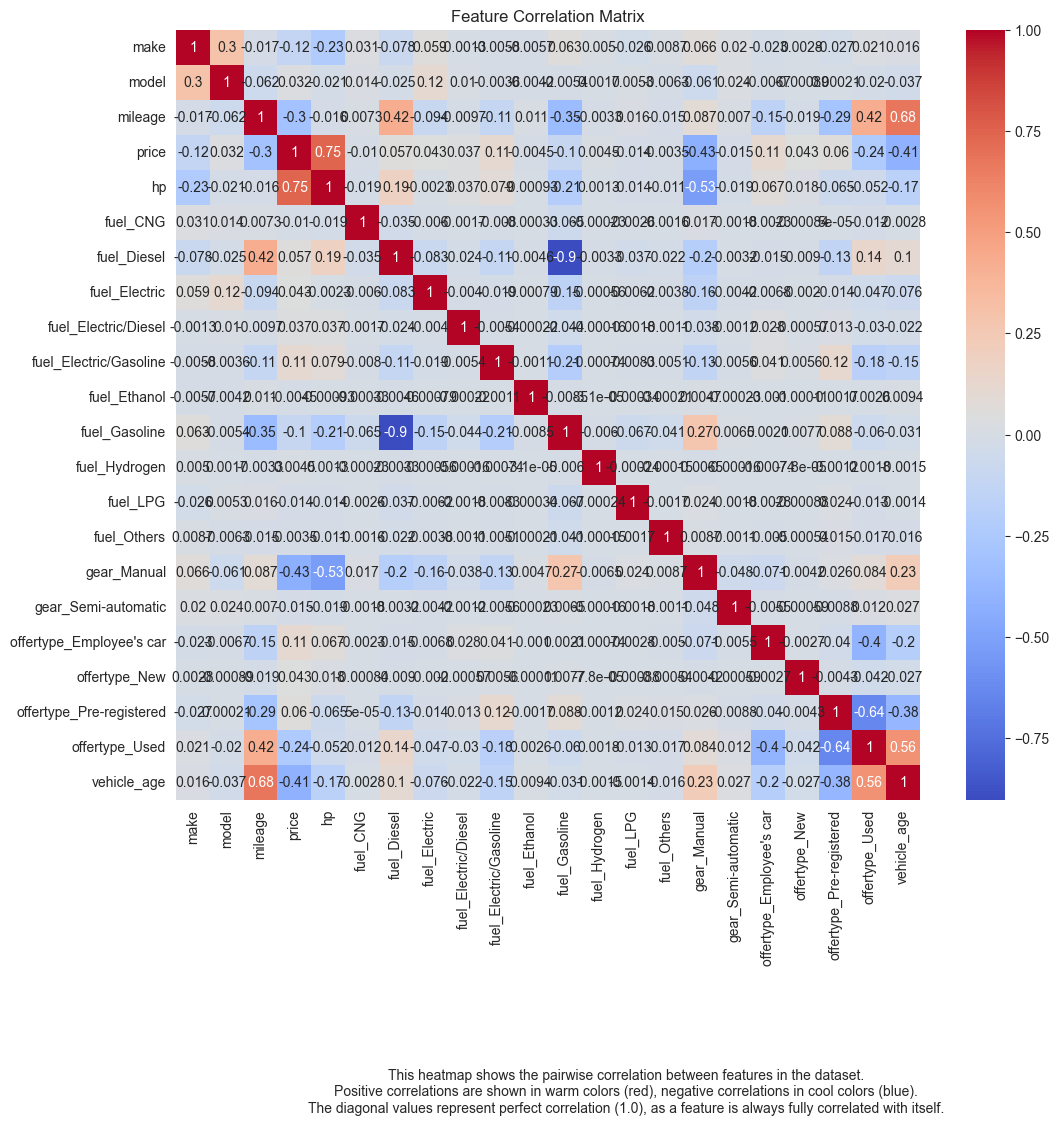

In [56]:
# Applying Exploratory data analysis (EDA) to check the relationship between columns 
# Already imported seaborn and matplotlib 

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.figtext(
    0.5, -0.2,  # 0.5 for center,-0.1 for below
    "This heatmap shows the pairwise correlation between features in the dataset.\n"
    "Positive correlations are shown in warm colors (red), negative correlations in cool colors (blue).\n"
    "The diagonal values represent perfect correlation (1.0), as a feature is always fully correlated with itself.",
    wrap=True,  # to wrap the text
    horizontalalignment='center', 
    fontsize=10 
)
plt.show()


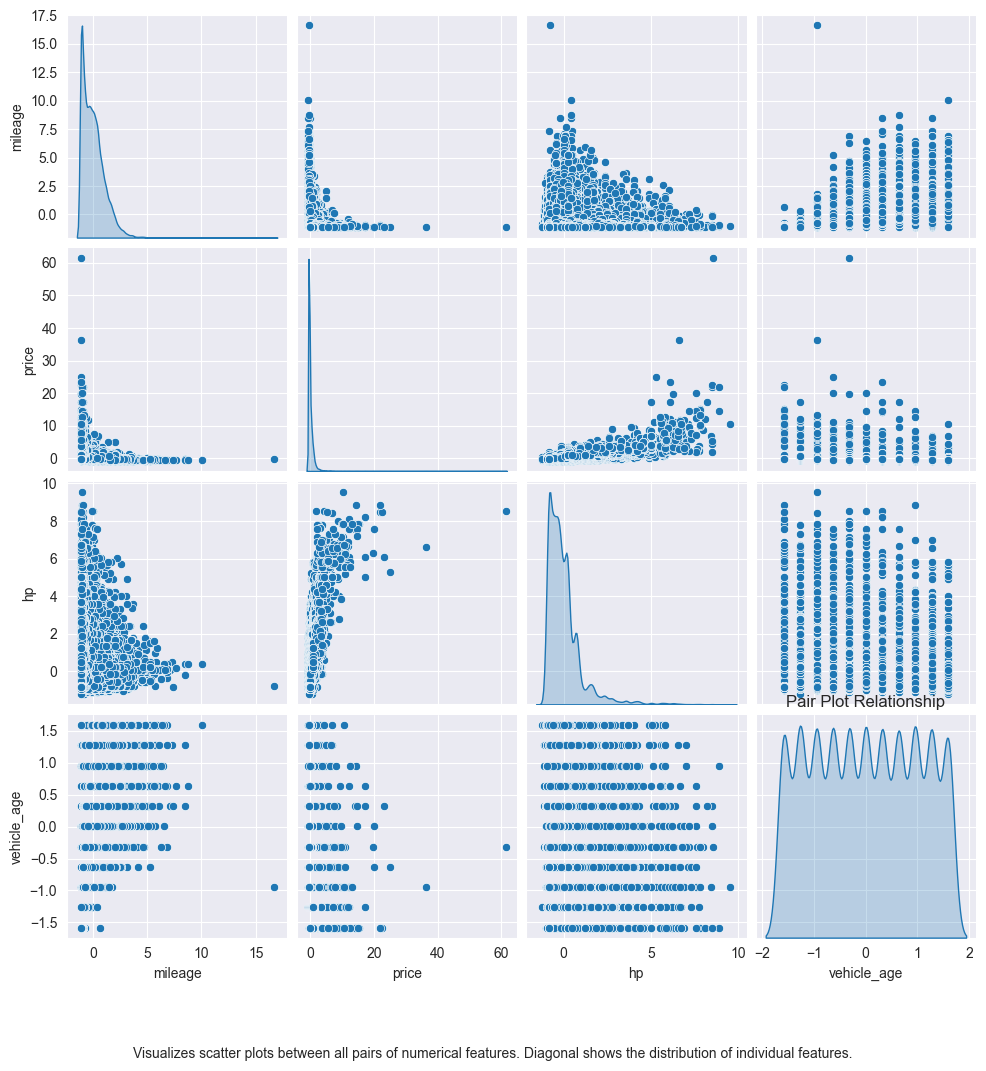

In [60]:
sns.pairplot(df[['mileage', 'price', 'hp', 'vehicle_age']], diag_kind='kde')
plt.title('Pair Plot Relationship')
plt.figtext(
    0.5, -0.06,  # 0.5 for center,-0.1 for below
    "Visualizes scatter plots between all pairs of numerical features. Diagonal shows the distribution of individual features.",
    horizontalalignment='center',
    fontsize=10
)
plt.show()


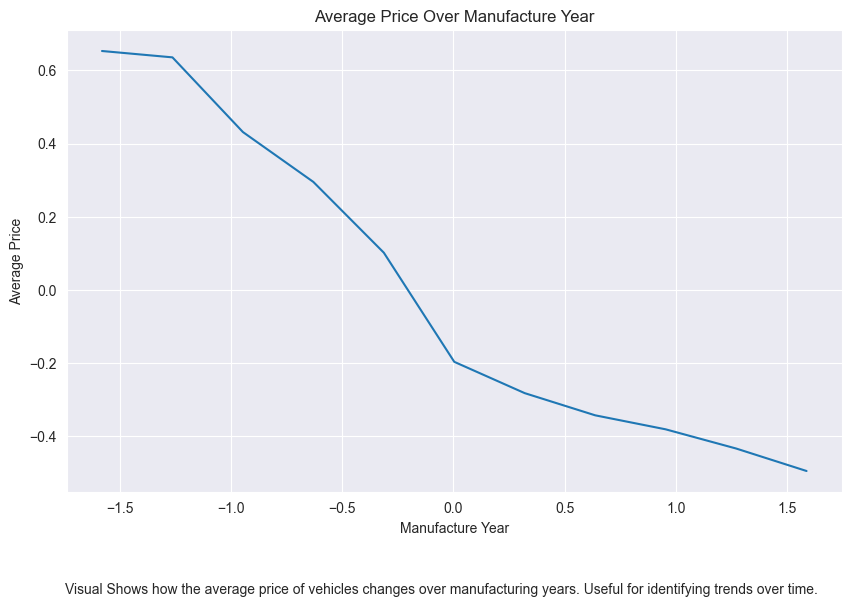

In [65]:
avg_price_by_year = df.groupby('vehicle_age')['price'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values)
plt.title('Average Price Over Manufacture Year')
plt.figtext(
    0.5, -0.06,  # 0.5 for center,-0.1 for below
    "Visual Shows how the average price of vehicles changes over manufacturing years. Useful for identifying trends over time.",
    horizontalalignment='center',
    fontsize=10
)
plt.xlabel('Manufacture Year')
plt.ylabel('Average Price')
plt.show()

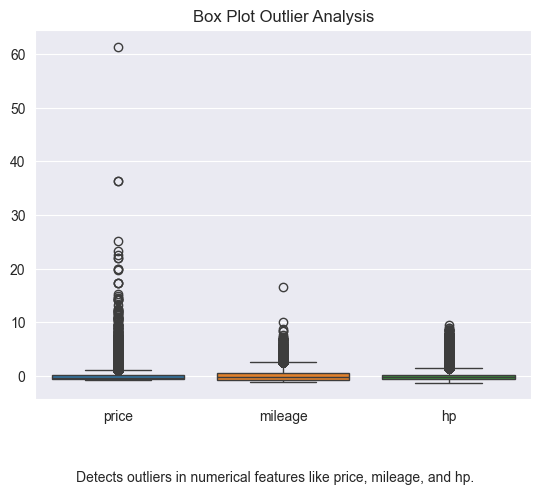

In [67]:
sns.boxplot(data=df[['price', 'mileage', 'hp']])
plt.title('Box Plot Outlier Analysis')
plt.figtext(
    0.5, -0.06,  # 0.5 for center,-0.1 for below
    "Detects outliers in numerical features like price, mileage, and hp.",
    horizontalalignment='center',
    fontsize=10
)
plt.show()

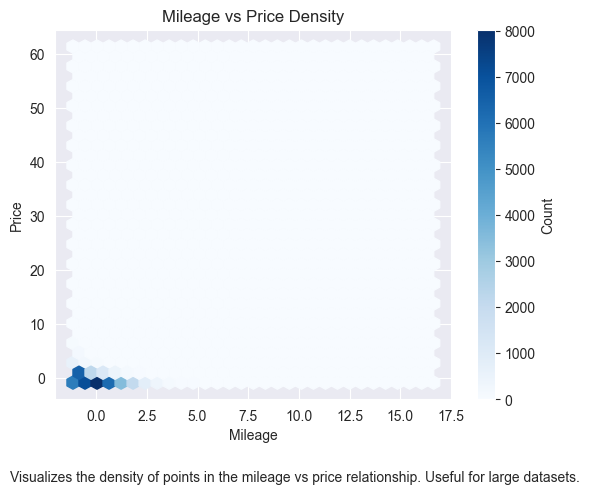

In [68]:
plt.hexbin(df['mileage'], df['price'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price Density')
plt.figtext(
    0.5, -0.06,  # 0.5 for center,-0.1 for below
    "Visualizes the density of points in the mileage vs price relationship.",
    horizontalalignment='center',
    fontsize=10
)
plt.show()


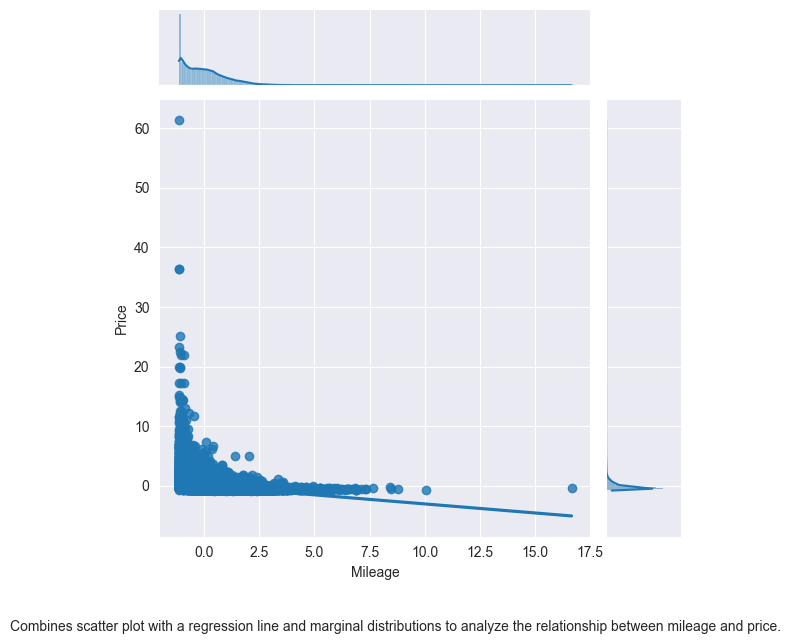

In [71]:
sns.jointplot(x='mileage', y='price', data=df, kind='reg')
#plt.title("Join Plot for Mileage and Price")
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.figtext(
    0.5, -0.06,  # 0.5 for center,-0.1 for below
    "Combines scatter plot with a regression line and marginal distributions to analyze the relationship between mileage and price.",
    horizontalalignment='center',
    fontsize=10
)
plt.show()

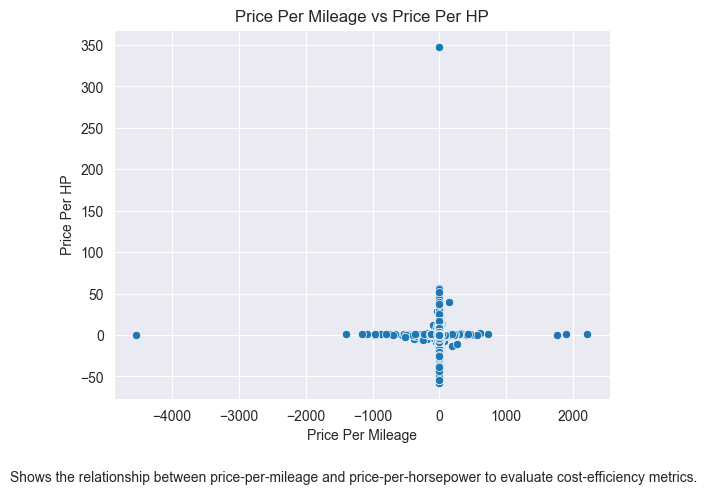

In [73]:
df['price_per_hp'] = df['price'] / df['hp']
df['price_per_mileage'] = df['price'] / df['mileage']

sns.scatterplot(x='price_per_mileage', y='price_per_hp', data=df)
plt.title('Price Per Mileage vs Price Per HP')
plt.figtext(
    0.5, -0.06,  # 0.5 for center,-0.1 for below
    "Shows the relationship between price-per-mileage and price-per-horsepower to evaluate cost-efficiency metrics.",
    horizontalalignment='center',
    fontsize=10
)
plt.xlabel('Price Per Mileage')
plt.ylabel('Price Per HP')
plt.show()

In [74]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])  # drop the price from df so all the other are treat as features
y = df['price'] # taking price as target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
''' The dataset is divided into two parts with training data of 80%  and 20% of testing data,
target variable is Price and features are other variables, the main goal of this models is to predict the car prices based on the other features like mileage,hp,etc. Price is numerical value so it is Regression Problem so we need to use Regression Algorithms to predict.
'''

' The dataset is divided into two parts with training data of 80%  and 20% of testing data,\ntarget variable is Price and features are other variables, the main goal of this models is to predict the car prices based on the other features like mileage,hp,etc. Price is numerical value so it is Regression Problem so we need to use Regression Algorithms to predict.\n'

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# model fitting
model = LinearRegression()
model.fit(X_train, y_train)
# making predictions
y_pred = model.predict(X_test)
# Displaying predicted values
print(f'R² Score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')


R² Score: 0.733522975769688
MSE: 0.22299989197205358


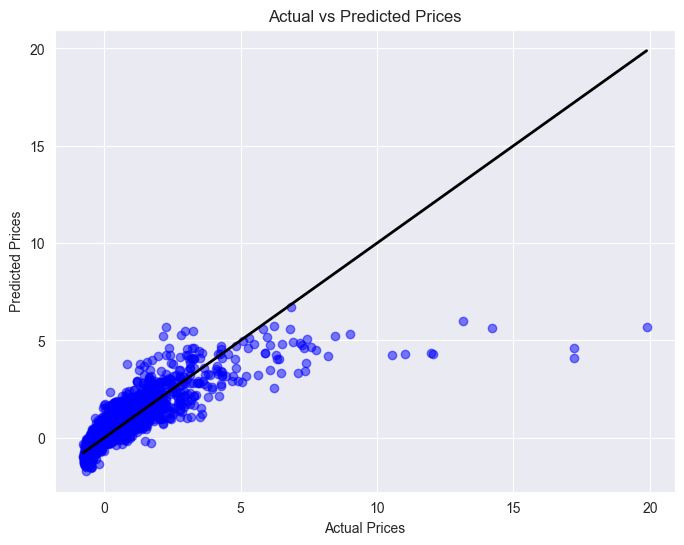

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', lw=2)  # Line showing perfect prediction
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred_rf = rf_model.predict(X_test)
print(f'R² Score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

R² Score: 0.9974405124431184
MSE: 0.0021418936598267876


RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

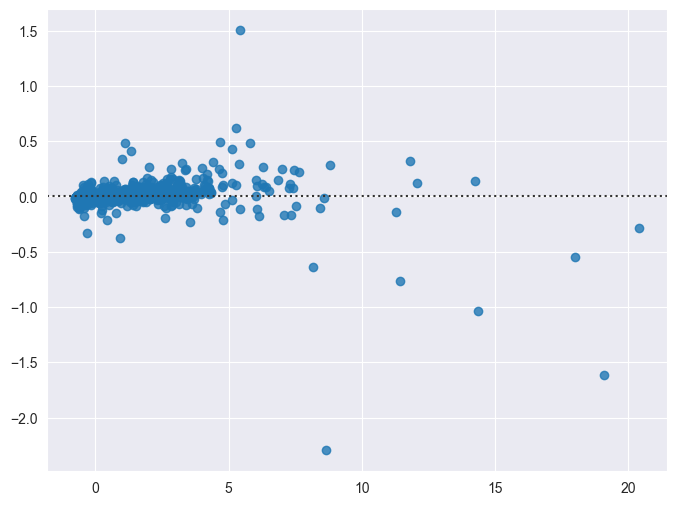

In [94]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_rf, y=residuals_rf, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Random Forest)')
plt.show()


In [95]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)
print(f'R² Score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

R² Score: 0.9974405124431184
MSE: 0.0021418936598267876


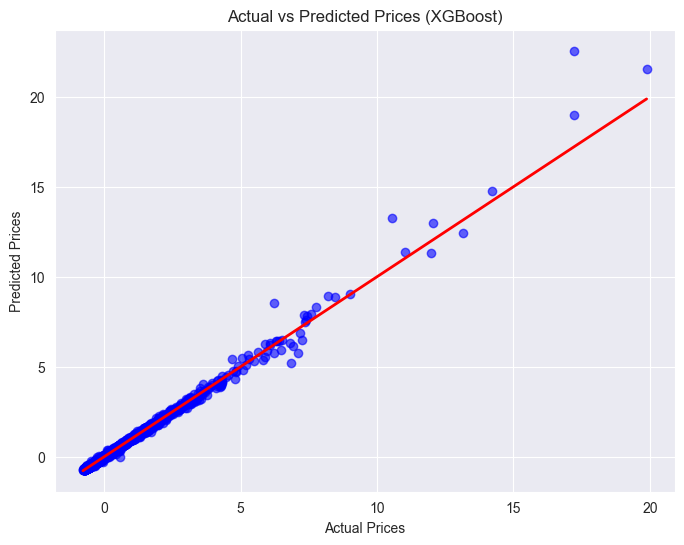

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Diagonal line for perfect predictions
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (XGBoost)')
plt.show()


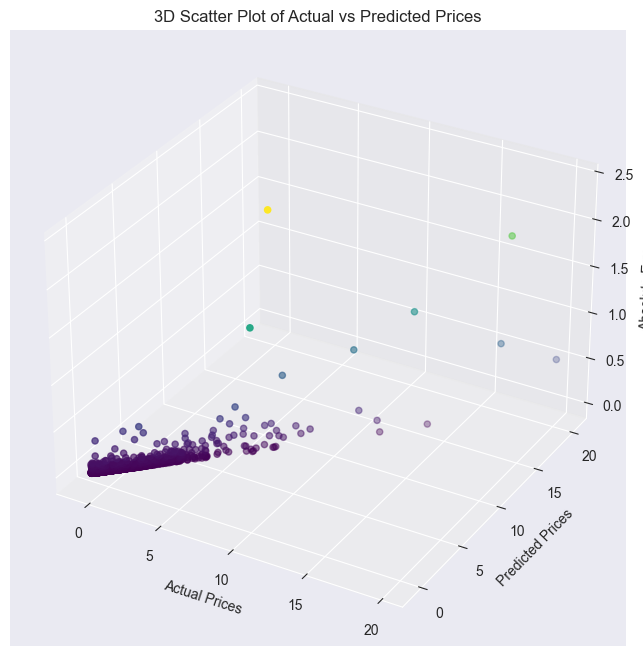

In [98]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y_test, y_pred, np.abs(y_test - y_pred), c=np.abs(y_test - y_pred), cmap='viridis')
ax.set_xlabel('Actual Prices')
ax.set_ylabel('Predicted Prices')
ax.set_zlabel('Absolute Error')
ax.set_title('3D Scatter Plot of Actual vs Predicted Prices')
plt.show()


In [ ]:
''' By Analysing 3 algorithms (LR, RF, XG Boost) it gives useful insights about performance of dataset.
What is R2 (Coefficient of Determination, 
Shows the variance of target variable (Price) when a produced value is closer to 1 then it tells it is a best fit of model, when it is closer to  0 then it is not to good. 
In our case Linear Regression shows 0.73 it is decent fit but not explained obout 27% of other factors.
While considering Random Forest & XG Boost that are very close to 1 there score is 0.9974 el this ar perfect Fits to data these are performing much better than LR.

When comes to mean square Error (USE) calculate mean square difference bw actual & predicted values. 
Low MSE basis good model performance. Here IR has 0.223 it is very high compared to other 2 models in predicting prices. Where RF& XG has 0.00214 it is very smaller than linked that shows it has very low prediction error & high performance. To conclude RF& XG are more sustainable odds '''

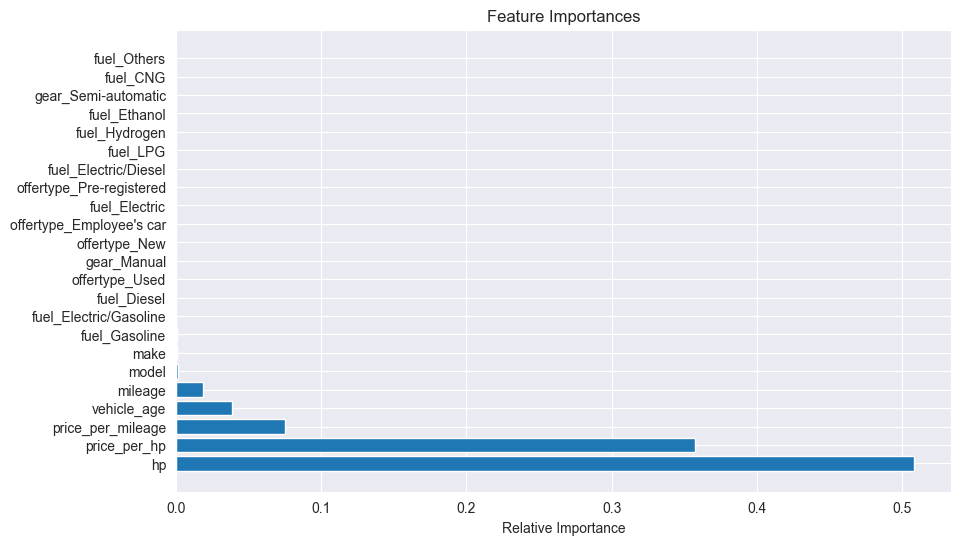

In [104]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.show()


In [112]:
import pandas as pd

# Create the new data with the same features as during training
new_data = pd.DataFrame({
    'make': [34, 41],  # Example values for make
    'model': [453, 233],
    'mileage': [20000, 30000],
    'hp': [100, 150],
    'fuel_CNG': [0, 0],  # Replace with actual values for fuel type
    'fuel_Diesel': [1, 1],
    'fuel_Electric': [0, 0],
    'fuel_Electric/Diesel': [0, 0],
    'fuel_Electric/Gasoline': [0, 0],
    'fuel_Ethanol': [0, 0],
    'fuel_Gasoline': [0, 0],
    'fuel_Hydrogen': [0, 0],
    'fuel_LPG': [0, 0],
    'fuel_Others': [0, 0],
    'gear_Manual': [1, 0],
    'gear_Semi-automatic': [0, 1],
    'offertype_Employee\'s car': [0, 0],
    'offertype_New': [1, 0],
    'offertype_Pre-registered': [0, 0],
    'offertype_Used': [0, 1],
    'vehicle_age': [1, 3],  # Assuming vehicle age is the difference between current year and manufacture year
    'price_per_hp': [168.8, 100],  # Assuming you calculated this column
    'price_per_mileage': [0.844, 0.166]  # Assuming you calculated this column
})

# Make predictions using the best model (Random Forest in this case)
predictions = rf_model.predict(new_data)

# Print predictions
print(predictions)



[38.29474589 39.09308266]


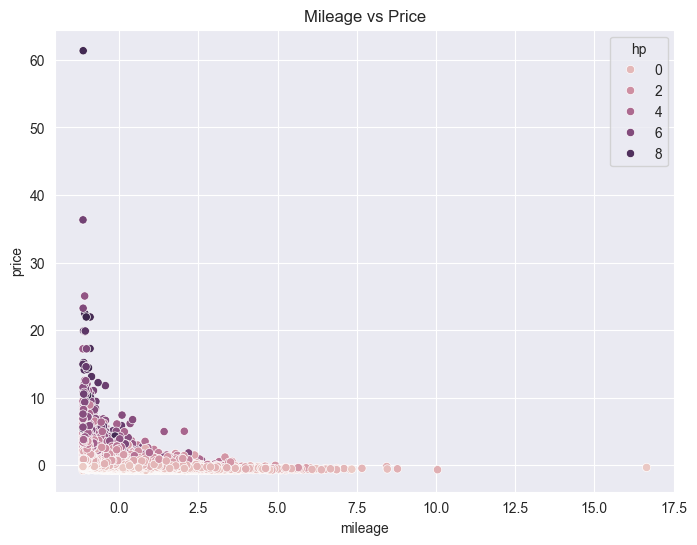

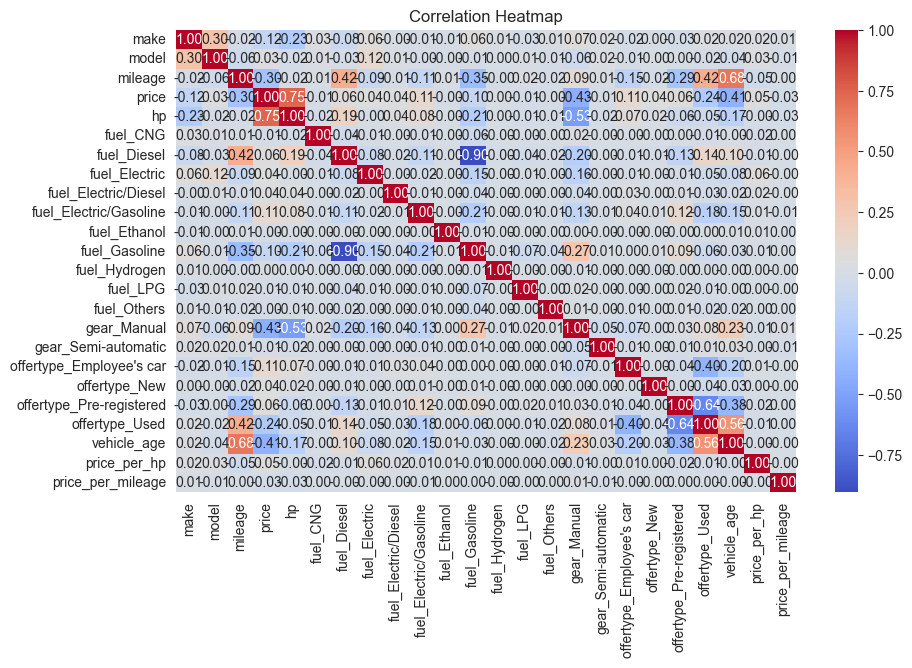

In [114]:
# Scatter plot of mileage vs price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='mileage', y='price', hue='hp')
plt.title('Mileage vs Price')
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [115]:
''' Analysing watch features are more effecting on predicting the car prices. It shown the Features like hp is more influening in predicting prices.

Giving a random data to get the prediction From the model. It gives predicted price based on the given make and model values like 38,294 euros. 
Before connecting to tableau di analysing & visualising the dataset & created plots based on mileage, price & hp.'''

' Analysing watch features are more effecting on predicting the car prices. It shown the Features like hp is more influening in predicting prices.\n\nGiving a random data to get the prediction From the model. It gives predicted price based on the given make and model values like 38,294 euros. \nBefore connecting to tableau di analysing & visualising the dataset & created plots based on mileage, price & hp.'

In [119]:
# It is used to save results in csv format and it can also share to other stakeholders if necessary
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
predictions_df.to_csv(r'C:\Users\saikumar\Desktop\MSc Data Analytics\Project_cars\car_price_predictions_from_python.csv', index=False)
